<h1 style="text-align:center;"> Mental Health </h1>

---

### Identifying mental health treatment for professionals in the work place

Using the [**Medical Treatment Dataset**](https://www.kaggle.com/datasets/shadabhussain/medical-treatment-dataset?select=trainms.csv)

In [2]:
import requests
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [3]:
#localy hosted api
apiurl = "http://localhost:5000/api/mentalhealth.csv"
#makes call to api as a get request 
r = requests.get(apiurl)

In [4]:
#converts api request from json to dataframe
df = pd.read_json(r.text)
df = df[df.columns[1:]]

## EDA: A First Look at the Data

In [5]:
df.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,Yes,3,2,0,1,1,...,1,2,0,0,0,1,0,2,1,0
1,44,1,0,0,No,1,6,0,0,2,...,2,0,2,0,0,0,0,0,2,0
2,31,1,0,0,No,0,4,1,1,1,...,2,0,0,0,0,1,1,1,2,0
3,33,1,0,1,No,2,2,0,1,1,...,2,0,0,0,1,1,0,2,2,0
4,35,0,0,1,Yes,2,1,1,1,0,...,0,3,2,2,0,0,0,0,2,0
5,42,0,0,1,Yes,2,4,0,1,1,...,0,4,2,0,1,1,0,2,0,0
6,31,1,0,0,Yes,2,2,1,1,2,...,2,0,0,0,0,1,0,0,2,0
7,42,0,0,1,Yes,2,3,0,0,1,...,2,3,1,1,1,1,2,2,0,1
8,36,1,0,1,No,0,5,0,1,2,...,2,0,0,0,1,1,0,0,2,0
9,29,0,0,1,Yes,1,3,0,1,1,...,2,2,0,0,1,0,2,2,2,0


A quick glance reveals there are a lot of categorical variables.

"treatment", the column of interest is categorical as well.

Let's take a look at the rest of the columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 746
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        747 non-null    int64 
 1   Gender                     747 non-null    int64 
 2   self_employed              747 non-null    int64 
 3   family_history             747 non-null    int64 
 4   treatment                  747 non-null    object
 5   work_interfere             747 non-null    int64 
 6   no_employees               747 non-null    int64 
 7   remote_work                747 non-null    int64 
 8   tech_company               747 non-null    int64 
 9   benefits                   747 non-null    int64 
 10  care_options               747 non-null    int64 
 11  wellness_program           747 non-null    int64 
 12  seek_help                  747 non-null    int64 
 13  anonymity                  747 non-null    int64 
 14  leave     

i only see one object variable so let's take a look at get dummies

In [7]:
pd.get_dummies(df)

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment_No,treatment_Yes
0,37,0,0,0,3,2,0,1,1,2,...,0,0,0,1,0,2,1,0,0,1
1,44,1,0,0,1,6,0,0,2,0,...,2,0,0,0,0,0,2,0,1,0
2,31,1,0,0,0,4,1,1,1,0,...,0,0,0,1,1,1,2,0,1,0
3,33,1,0,1,2,2,0,1,1,2,...,0,0,1,1,0,2,2,0,1,0
4,35,0,0,1,2,1,1,1,0,0,...,2,2,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,36,1,0,1,1,6,0,0,2,0,...,2,2,0,0,0,0,2,0,0,1
743,32,1,0,1,3,3,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1
744,34,1,0,1,2,6,0,1,1,1,...,1,1,0,0,0,0,0,0,1,0
745,46,0,0,0,2,4,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0


The number of columns increased from 23 to 24 so only one categorical variable has not yet been converted.

In [8]:
df["treatment"]  = df["treatment"].apply(lambda x:( 1 if x=="Yes" else 0))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 746
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        747 non-null    int64
 1   Gender                     747 non-null    int64
 2   self_employed              747 non-null    int64
 3   family_history             747 non-null    int64
 4   treatment                  747 non-null    int64
 5   work_interfere             747 non-null    int64
 6   no_employees               747 non-null    int64
 7   remote_work                747 non-null    int64
 8   tech_company               747 non-null    int64
 9   benefits                   747 non-null    int64
 10  care_options               747 non-null    int64
 11  wellness_program           747 non-null    int64
 12  seek_help                  747 non-null    int64
 13  anonymity                  747 non-null    int64
 14  leave                     

Now that everything has been transformed let's look at some summary statisics

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,747.0,33.382865,13.505857,-29.0,28.0,32.0,37.5,329.0
Gender,747.0,0.752343,0.431941,0.0,1.0,1.0,1.0,1.0
self_employed,747.0,0.072289,0.259140,0.0,0.0,0.0,0.0,1.0
family_history,747.0,0.436412,0.496272,0.0,0.0,0.0,1.0,1.0
treatment,747.0,0.515395,0.500098,0.0,0.0,1.0,1.0,1.0
work_interfere,747.0,1.627845,0.885193,0.0,1.0,2.0,2.0,3.0
no_employees,747.0,3.745649,1.725721,1.0,2.0,3.0,6.0,6.0
remote_work,747.0,0.315930,0.465197,0.0,0.0,0.0,1.0,1.0
tech_company,747.0,0.812584,0.390507,0.0,1.0,1.0,1.0,1.0
benefits,747.0,1.159304,0.669163,0.0,1.0,1.0,2.0,2.0


In [11]:
df.Age[df.Age < 16]

92    -29
447     5
671    11
Name: Age, dtype: int64

In [12]:
df.Age[df.Age > 100]

235    329
Name: Age, dtype: int64

In [13]:
df = df.drop(labels=[92,235,447,671],axis=0)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,743.0,33.137281,7.651788,18.0,28.0,32.0,37.5,72.0
Gender,743.0,0.751009,0.432720,0.0,1.0,1.0,1.0,1.0
self_employed,743.0,0.071332,0.257553,0.0,0.0,0.0,0.0,1.0
family_history,743.0,0.438762,0.496570,0.0,0.0,0.0,1.0,1.0
treatment,743.0,0.515478,0.500097,0.0,0.0,1.0,1.0,1.0
work_interfere,743.0,1.627187,0.883917,0.0,1.0,2.0,2.0,3.0
no_employees,743.0,3.748318,1.724227,1.0,2.0,3.0,6.0,6.0
remote_work,743.0,0.313594,0.464266,0.0,0.0,0.0,1.0,1.0
tech_company,743.0,0.812921,0.390238,0.0,1.0,1.0,1.0,1.0
benefits,743.0,1.160162,0.668849,0.0,1.0,1.0,2.0,2.0


In [15]:
#data frame with no continuous variables
df_cat= df[df.columns[1:]]

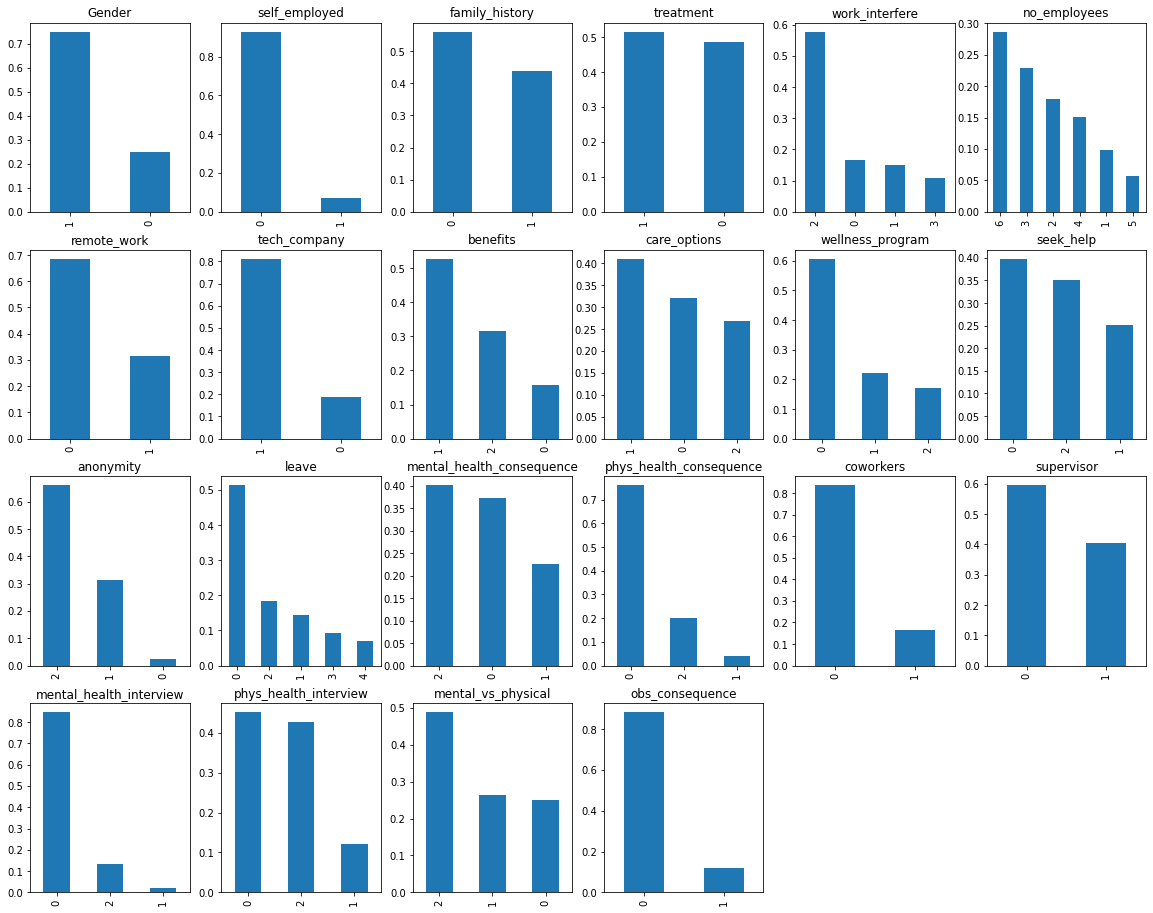

In [16]:
n = 1
plt.figure(figsize=(20,16))

for col in df_cat.columns:
    plt.subplot(4,6,n)
    df_cat[col].value_counts(normalize=True).plot(kind="bar"); plt.title(str(col))
    n +=1


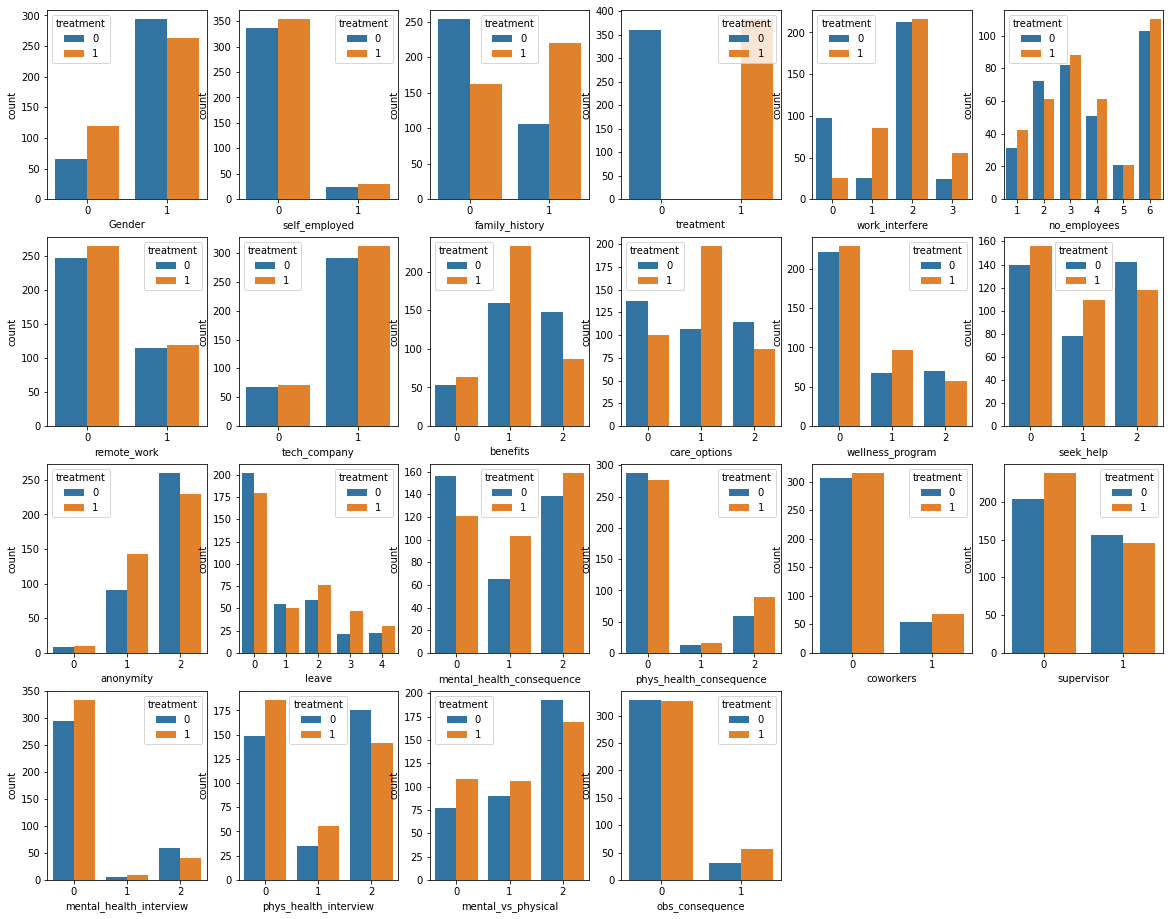

In [17]:
plt.figure(figsize=(20,16))
m = 1
for col in df_cat.columns:
    plt.subplot(4,6,m)
    sns.countplot(x = col, hue="treatment", data=df_cat)
    m += 1

In [69]:
x = df.loc[:,df.columns.difference(["treatment"])]

y = pd.DataFrame({"treatment":df["treatment"].apply(lambda x:( 1 if x=="Yes" else 0))})


In [ ]:
print(10)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [66]:
bst = xgb.XGBClassifier().fit(x_train,y_train)

In [67]:
# locally trained model
y_hat= bst.predict(x_test)

In [68]:
#model performance
accuracy_score(y_hat,y_test)

0.6237458193979933